<div style="text-align: center;"> 
  <div style="padding:20px; 
              color:#1DA1F2; 
              font-size:220%; 
              border-radius:20px; 
              border-width: 5px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 2px 2px 10px rgba(29,161,242,0.8); 
              box-shadow: 0 0 15px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: 1000px; 
              margin: auto;">
  Problem Statement
  </div>
</div>

In today's digital age, social media platforms are very much popular amongst all age categories. Approximately, 63.9% of the words population (5.24 billion) uses social media platforms with an average user spending roughly 2 hours 21 minutes on it daily. Today, social media platforms have become the primary channel for communication and interactions. However, since 2013 there has been a steady rise on the overall negativity present on the platforms. The main driving force for this rise is due to the hate speech and offensive language remarks present all over social media. These forms of expression can perpetuate discrimination, foster hostility, and negatively impact ones mental well-being.

Hate speech is generally defined as any communication that attacks or denigrates a person or group based on attributes like race, religion, ethnicity, gender, sexual orientation, or disability. Offensive language, less severe, is defined by words or phrases that can be used in a disrespectful, insulting, or hurtful manner without targeting a particular group. Both are considered as a negative form of message to the opposite party.

The presence of such language leads to several significant issues:

User Safety: Hate speech and offensive language create unsafe online spaces, discouraging healthy discussions and making users feel alienated.
Platform Reputation: Platforms that fail to address these concerns risk losing user trust and facing scrutiny from regulators.
Legal and Ethical Implications: Many countries enforce strict laws against hate speech, requiring platforms to take proactive measures to filter such content.
Scalability of Moderation: Given the vast amount of content generated daily, manual moderation is neither practical nor scalable.

Our goal is to build a model which can identify such negative remarks and comments and prevent it from reaching the victim before its too late. This way we can make social media a safe environment for everyone to use and foster healthy relationships between the users.

<div style="display: flex; gap: 20px; align-items: center;">
  <img src="image.webp" alt="Image Description" width="550" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  <img src="image2.jpg" alt="Image Description" width="600" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
</div>

<div style="text-align: center;">
  <div style="padding:20px; 
              color:#1DA1F2; 
              font-size:220%; 
              border-radius:20px; 
              border-width: 5px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 2px 2px 10px rgba(29,161,242,0.8); 
              box-shadow: 0 0 15px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: 1000px; 
              margin: auto;">
  Background information on the dataset
  </div>
</div>

The dataset we are using, named hate_speech_offensive, is a meticulously curated collection of annotated tweets with the specific purpose of detecting hate speech and offensive language. The dataset primarily consists of English tweets and is designed to train machine learning models or algorithms in the task of hate speech detection. It should be noted that the dataset has not been divided into multiple subsets, and only the train split is currently available for use.

The dataset includes several columns that provide valuable information for understanding each tweet's classification. The column count represents the total number of annotations provided for each tweet, whereas hate_speech_count signifies how many annotations classified a particular tweet as hate speech. On the other hand, offensive_language_count indicates the number of annotations categorizing a tweet as containing offensive language. Additionally, neither_count denotes how many annotations identified a tweet as neither hate speech nor offensive language.

For researchers and developers aiming to create effective models or algorithms capable of detecting hate speech and offensive language on Twitter, this comprehensive dataset offers a rich resource for training and evaluation purposes

It consists of annotated tweets with information about their classification as hate speech, offensive language, or neither. Each row represents a tweet along with the corresponding annotations provided by multiple annotators. The main columns that will be essential for your analysis are: count (total number of annotations), hate_speech_count (number of annotations classifying a tweet as hate speech), offensive_language_count (number of annotations classifying a tweet as offensive language), neither_count (number of annotations classifying a tweet as neither hate speech nor offensive language).

The data collection methodology used to create this dataset involved obtaining tweets from Twitter's public API using specific search terms related to hate speech and offensive language. These tweets were then manually labeled by multiple annotators who reviewed them for classification purposes.

<div style="padding:10px; 
              color:#1DA1F2; 
              font-size:150%;
              border-radius:20px; 
              border-width: 3px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; 
              margin: auto;">1 |
  Importing necessary modules
  </div>

In [695]:
# Machine Learning Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight

# Natural Language Processing (NLP) Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from lime.lime_text import LimeTextExplainer
from collections import OrderedDict
from IPython.display import display_html

# Data Manipulation and Processing
import pandas as pd
import numpy as np
from collections import Counter
from tabulate import tabulate

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import warnings
pd.options.mode.chained_assignment = None


<div style="padding:10px; 
              color:#1DA1F2; 
              font-size:150%; 
              border-radius:20px; 
              border-width: 3px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto;
              margin: auto;">2 |
  Exploratory Data Analysis
  </div>

In [696]:
df=pd.read_csv("train.csv")

In [697]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [699]:
df.shape

(24783, 6)

In [700]:
df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'class', 'tweet'],
      dtype='object')

In [701]:
df.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [702]:
df['class'].unique()

array([2, 1, 0])

In [703]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Right now the target variable has 3 classes (Hate speech, Offensive Language, Neither). The dataset is dominated by offensive lanugage tweets.

To better view the dataset, a labels column would be created and the classification of the tweet will be mapped accoriding to the class digit.

In [704]:
class_labels = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
class_counts = df['class'].value_counts()

In [705]:
df['labels'] = df['class'].map(class_labels)

In [706]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


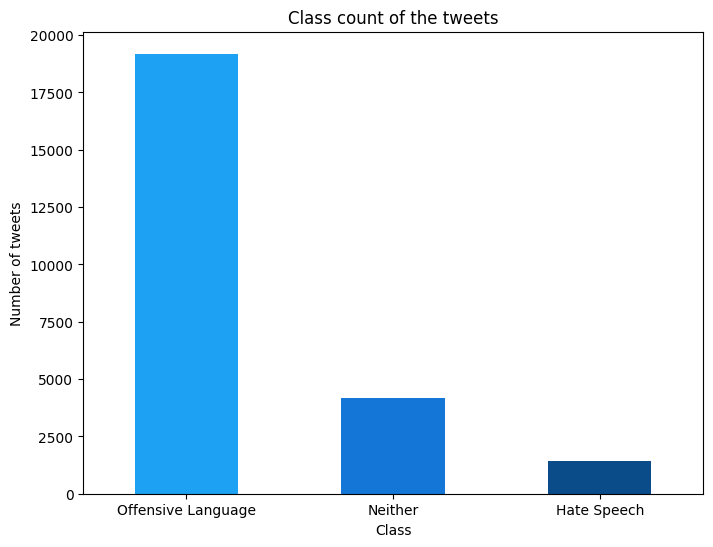

In [707]:
palette = ['#1DA1F2', '#1476D6', '#0A4C8A']

plt.figure(figsize=(8, 6))
class_counts.rename(index=class_labels).plot(kind='bar', color=palette)
plt.title('Class count of the tweets')
plt.xlabel('Class')
plt.ylabel('Number of tweets')
plt.xticks(rotation=0)
plt.show()

From this countplot it is evident that majority of the tweets are classified as offensive language. Hate speech and neither class on the other hand has a narrower gap between them. This class imbalance is a critical factor to be considered during data cleaning & preprocessing to ensure that the model does not become biased towards the dominant class which could affect the overall performance and fairless of the classification models.

In [708]:
import plotly.express as px
fig = px.pie(df, values=class_counts.values, names=class_labels, color=class_labels,
             color_discrete_map={'Hate Speech':'cyan',
                                 'Offensive Language':'royalblue',
                                 'Neither':'darkblue'})

fig.update_traces(textinfo='percent+label', texttemplate='%{label}<br>%{percent:.1%}', 
                  hovertemplate='%{label}: %{value}', 
                  marker=dict(line=dict(color='white', width=2)))

fig.update_layout(
    title = "Percentage distribution of the tweets by class"
)

fig.show()

From the pie chart we are able to see the percentage breakdown of the different tweet classes.
| class       | percentage |
|--------|-------|
| Hate Speech  | 77.4%    |
| Offensive Language  | 16.8%     |
| Neither  | 5.8%     |

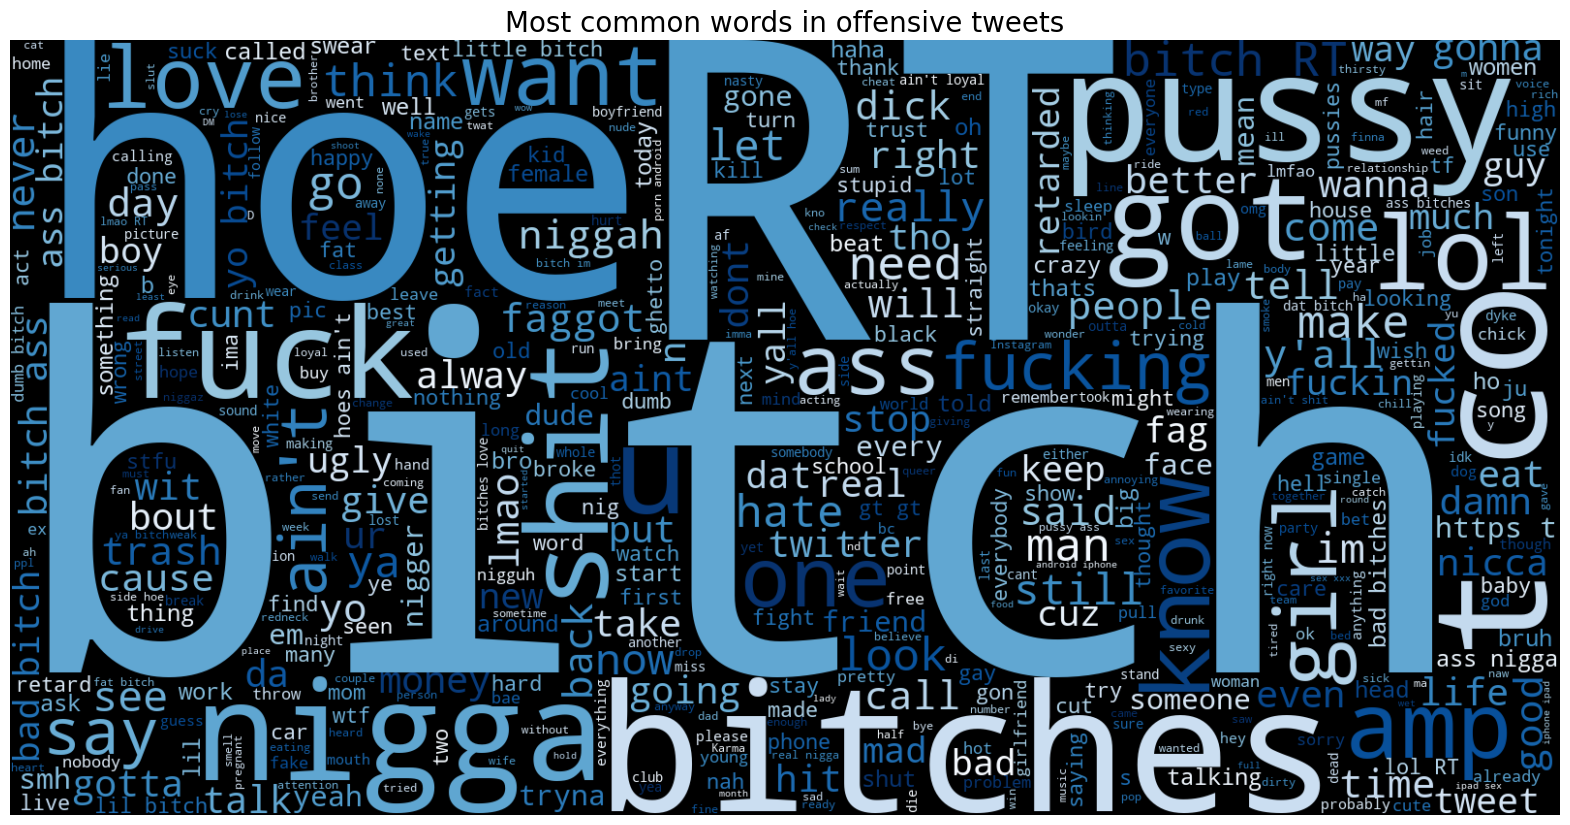

In [709]:
offensive_tweets = df[df['labels'] == 'Offensive Language']['tweet']

text = ' '.join(offensive_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in offensive tweets', fontsize=20)
plt.show()

Through the word cloud we are able to see the common words present in the offensive tweets. 
Words such as 'bitch', 'RT', 'hoe', 'bitches', 'fuck' are most commonly present words.

However, the term 'RT' refers to retweet and it is not meaningful word in the sentence. By removing the term 'RT' from the sentences the meaning of the setence would not change and the NLP model will be able to focus on the actual words determing the classification. Will handle this during the data cleansing portion further down the notebook.

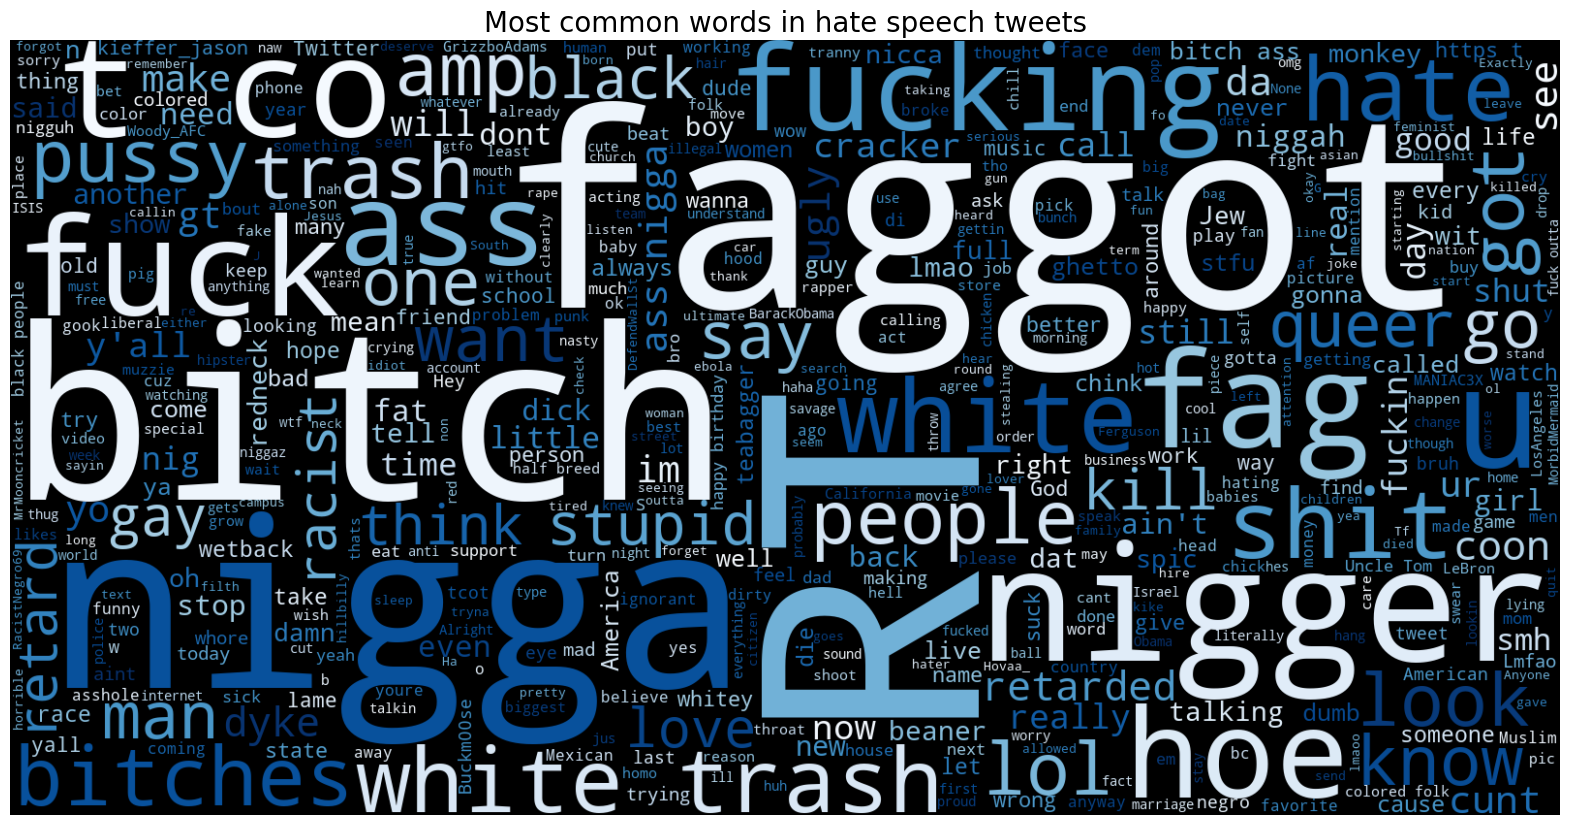

In [710]:
hate_tweets = df[df['labels'] == 'Hate Speech']['tweet']

text = ' '.join(hate_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in hate speech tweets', fontsize=20)
plt.show()

Through the word cloud we are able to see the common words present in the hate speech tweets. 
Words such as 'faggot, 'nigga', 'RT', 'hoe', 'bitch', 'fuck' are most commonly present words.

Similar effect of term 'RT' to the modelling in the future (As explained above).

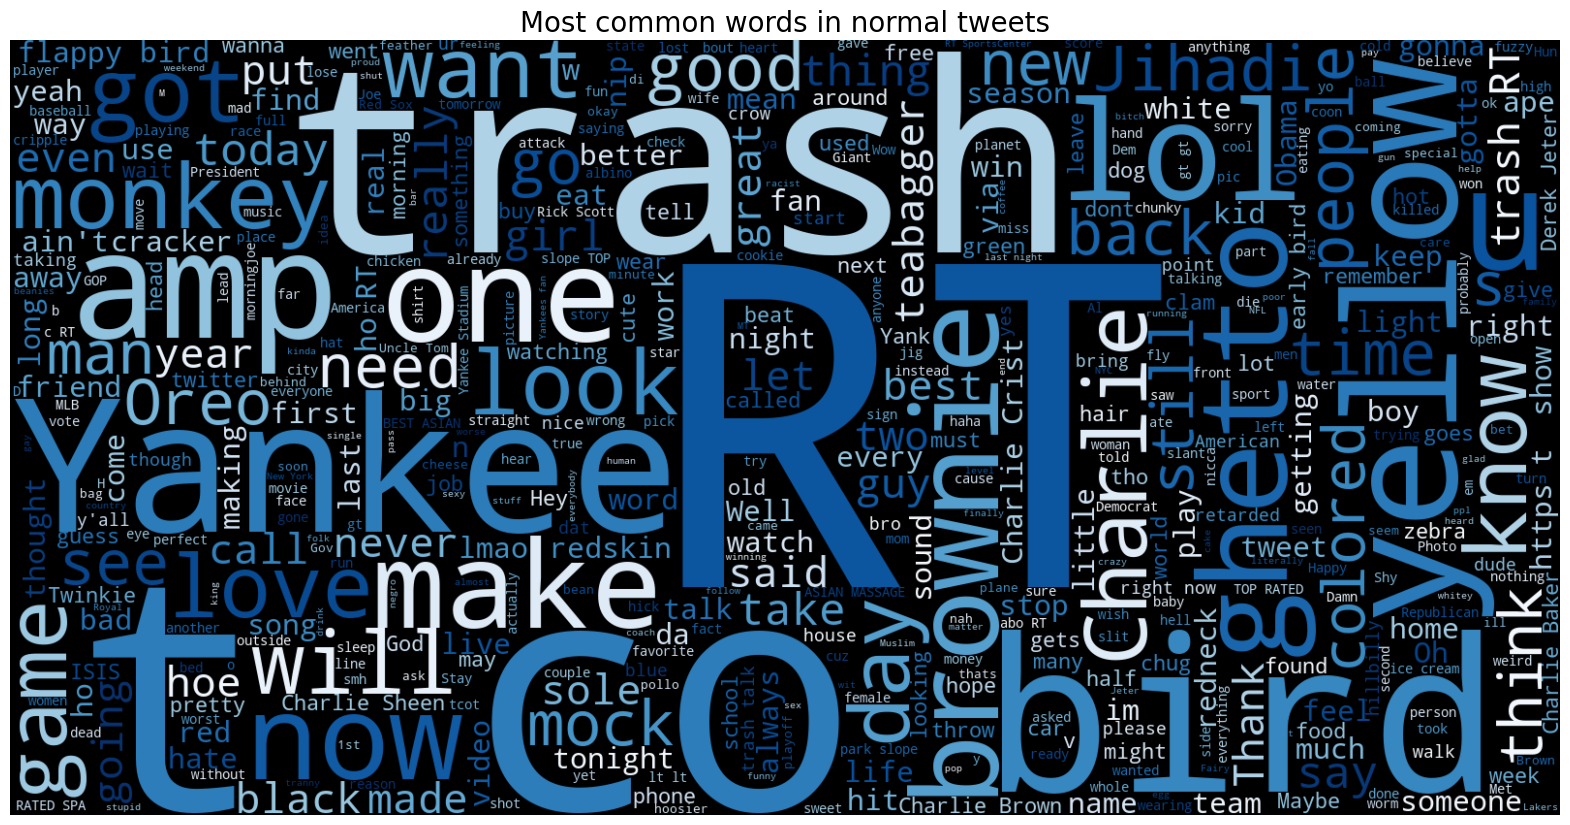

In [711]:
normal_tweets = df[df['labels'] == 'Neither']['tweet']

text = ' '.join(normal_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in normal tweets', fontsize=20)
plt.show()

Through the word cloud we are able to see the common words present in the normal tweets. 
Words such as 'lol', 'RT', 'CO', 'bird', 'trash', 'yell', 't' are most commonly present words.

Similar effect of term 'RT' to the modelling in the future (As explained above).
Term's such as 't', 'co' also comes under this case.

However, from the 3 word clouds we could not see the exact count of the common words occurences. Hence, lets generate a dataframe to tackle this.

In [712]:
normal_speech = df[df['labels'] == 'Neither']
hate_speech = df[df['labels'] == 'Hate Speech']
offensive_speech = df[df['labels'] == 'Offensive Language']

In [713]:
normal_speech.loc[:, 'word_list'] = normal_speech['tweet'].apply(lambda x: str(x).split())
hate_speech.loc[:, 'word_list'] = hate_speech['tweet'].apply(lambda x: str(x).split())
offensive_speech.loc[:, 'word_list'] = offensive_speech['tweet'].apply(lambda x: str(x).split())

def top_words(df, label):
    top = Counter([item for sublist in df['word_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(10))
    temp.columns = [label, 'count']
    return temp.style.background_gradient(cmap='Blues')

normal_words = top_words(normal_speech, 'Normal Words')
hate_words = top_words(hate_speech, 'Hate Speech Words')
offensive_words = top_words(offensive_speech, 'Offensive Words')

html = f"""
<div style='display: flex;  gap: 20px; text-align:center;'>
    <div>{offensive_words._repr_html_()}</div>
    <div>{hate_words._repr_html_()}</div>
    <div>{normal_words._repr_html_()}</div>
</div>
"""
display_html(html, raw=True)


,Offensive Words,count
0,a,7301
1,bitch,6464
2,RT,5912
3,I,5252
4,the,4545
5,you,4092
6,to,3926
7,and,2639
8,my,2599
9,that,2588


From this majority of the words are stop words. Stopwords are used commonly in english sentences for grammer and better flow.

In English, examples of stop words include:

Articles: a, an, the

Conjunctions: and, but, or

Prepositions: in, on, at, with

Pronouns: he, she, it, they

Common verbs: is, am, are, was, were, be, being, been

Therefore to get the exact count of the common words bases on the labels, we need to omit the stop words. Even though this process need to be done under data cleansing, for visualisation purposes will remove the stop words now and generate the dataframes again (Would use the respective word classes created instead of the tweet class). Tweet class would be properly cleansed in the data cleaning/preprocessing section.

In [714]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = str(text).split() 
    clean = [word for word in words if word.lower() not in stop_words]  
    return " ".join(clean)  

normal_speech['tweet'] = normal_speech['tweet'].apply(remove_stopwords)
hate_speech['tweet'] = hate_speech['tweet'].apply(remove_stopwords)
offensive_speech['tweet'] = offensive_speech['tweet'].apply(remove_stopwords)

In [715]:
normal_speech.loc[:, 'word_list'] = normal_speech['tweet'].apply(lambda x: str(x).split())
hate_speech.loc[:, 'word_list'] = hate_speech['tweet'].apply(lambda x: str(x).split())
offensive_speech.loc[:, 'word_list'] = offensive_speech['tweet'].apply(lambda x: str(x).split())

normal_words = top_words(normal_speech, 'Normal Words')
hate_words = top_words(hate_speech, 'Hate Speech Words')
offensive_words = top_words(offensive_speech, 'Offensive Words')

html = f"""
<div style='display: flex;  gap: 20px; text-align:center;'>
    <div>{offensive_words._repr_html_()}</div>
    <div>{hate_words._repr_html_()}</div>
    <div>{normal_words._repr_html_()}</div>
</div>
"""
display_html(html, raw=True)


,Offensive Words,count
0,bitch,6464
1,RT,5912
2,bitches,2525
3,like,2095
4,hoes,1871
5,pussy,1667
6,hoe,1413
7,ass,1318
8,get,1136
9,got,1062


Now we are able to see the number of occurences for each of the top 10 words for the respective classes. We can see that the word 'bitch' and 'bitches' dominate the offensive words category if we exclude 'RT'. However, for the hate speech words and normal words, they have a relatively balanced distribution. This might be due to the large amount of data for the offensive class causing such skewing to be present.

In [716]:
df['tweet_length'] = df['tweet'].apply(len)

fig = px.box(df, 
             x='class', 
             y='tweet_length', 
             color='class', 
             title='Tweet Length Distribution by Class',
             template='plotly_white', 
             color_discrete_sequence=['royalblue', 'cyan', 'blue'])

fig.update_traces(marker=dict(opacity=0.8, 
                              line=dict(width=2, color='#0077ff')))

fig.update_layout(
    title_font=dict(size=24, color='#0057d9', family='Courier New'),
    xaxis_title="Class",
    yaxis_title="Tweet Length",
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='#0057d9', family='Courier New'),
    hoverlabel=dict(bgcolor='#e6f2ff', font=dict(color='#002bb8')),
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=0.8, gridcolor='#cce6ff')
fig.update_yaxes(showgrid=True, gridwidth=0.8, gridcolor='#cce6ff')

fig.show()

From the box plot we can clearly see that the offensive language class tends to have longer tweets.This means that offensive tweets often come in long rants or heated replies. Whereas the hate speech and normal speech classes tends to have a fewer outliers with a more compact distribution in the tweet length.

If we take a look at the median:
Normal speech has the longest median of 97.
Hate speech has a median of 82.
Offensive speech has a median of 78 with many extreme outliers leading up to 758.

We can conclue that the shorter the tweet, the more liekly it is to be offensive or hateful.
However, offensive tweets have the most variation in length, meaning people express anger both in short insults or long heated arguments.

Therefore, it is important to normalize the tweet length before feeding it into the model.

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">3 |
  Data Preprocessing & Data Cleaning
  </div>

In [717]:
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
labels                      0
tweet_length                0
dtype: int64

In [718]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels,tweet_length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language,137


Since we want to classify whether a tweet is positive or negative lets merge the offensive language and hate speech to negative tweet and consider the neither label as a positive tweet.

In [719]:
df['class'] = df['class'].apply(lambda x: 0 if x in [0, 1] else 1)
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels,tweet_length
0,3,0,0,3,1,!!! RT @mayasolovely: As a woman you shouldn't...,Neither,140
1,3,0,3,0,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language,85
2,3,0,3,0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language,120
3,3,0,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language,62
4,6,0,6,0,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language,137


In [720]:
class_labels = {0: 'negative', 1: 'positive'}
df['labels'] = df['class'].map(class_labels)
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels,tweet_length
0,3,0,0,3,1,!!! RT @mayasolovely: As a woman you shouldn't...,positive,140
1,3,0,3,0,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,negative,85
2,3,0,3,0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,negative,120
3,3,0,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,negative,62
4,6,0,6,0,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,negative,137


Lets now clean the data before starting on feature engineering

In [721]:
stop_words = stopwords.words('english')
stop_words.remove('not')  # Keeping 'not' as it is important in negation (Can change the meaning of the sentence)

def clean(text):

    # Remove 'RT' (Retweet indicator)
    text = re.sub(r'\bRT\b', '', text)

    # Remove URLs 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove Twitter handles 
    text = re.sub(r'@\w+', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = text.split()

    # Removing the stop words
    words = [word for word in words if word not in stop_words]
    
    # Rejoin the words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [722]:
df.loc[:, 'cleaned_tweet'] = df['tweet'].apply(clean)
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels,tweet_length,cleaned_tweet
0,3,0,0,3,1,!!! RT @mayasolovely: As a woman you shouldn't...,positive,140,woman complain cleaning house amp man always t...
1,3,0,3,0,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,negative,85,boy dats cold tyga dwn bad cuffin dat hoe st p...
2,3,0,3,0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,negative,120,dawg ever fuck bitch start cry confused shit
3,3,0,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,negative,62,look like tranny
4,6,0,6,0,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,negative,137,shit hear might true might faker bitch told ya


Removing the outliers from the dataset based on the tweet length, so as to have a fair & balanced modelling in the later part of the project

In [723]:
print(df.shape)

tweet_length = df['cleaned_tweet'].apply(len)

Q1 = tweet_length.quantile(0.25)
Q3 = tweet_length.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(tweet_length >= lower_bound) & (tweet_length <= upper_bound)]

print(df.shape)


(24783, 9)
(24737, 9)


After this process we can see that 46 outlier data was removed from the dataset.

In [724]:
df.drop(['tweet', 'tweet_length'], axis=1, inplace=True)
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,labels,cleaned_tweet
0,3,0,0,3,1,positive,woman complain cleaning house amp man always t...
1,3,0,3,0,0,negative,boy dats cold tyga dwn bad cuffin dat hoe st p...
2,3,0,3,0,0,negative,dawg ever fuck bitch start cry confused shit
3,3,0,2,1,0,negative,look like tranny
4,6,0,6,0,0,negative,shit hear might true might faker bitch told ya


In [725]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,count,hate_speech_count,offensive_language_count,neither_count,class,labels,cleaned_tweet
563,3,0,3,0,0,negative,hoes loyal
873,3,0,1,2,1,positive,porn android iphone ipad sex xxx desi paki
883,3,0,3,0,0,negative,porn android iphone ipad sex xxx hairy hairy p...
1028,3,0,3,0,0,negative,cunt
1223,3,0,3,0,0,negative,hoes loyal
...,...,...,...,...,...,...,...
24589,3,0,3,0,0,negative,need bitches
24609,3,0,0,3,1,positive,trash
24660,3,0,2,1,0,negative,hoe
24724,3,0,3,0,0,negative,give bitch inch rather


Removing the duplicate rows to prevent the biasness during modelling in the next phase of the project

In [726]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [727]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,count,hate_speech_count,offensive_language_count,neither_count,class,labels,cleaned_tweet


<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">4 |
  Feature Engineering
  </div>

#### Stemming & Lemmatization

<div>
<p><strong>Stemming and Lemmatization</strong> are processes that reduce word variants to root form.</p>
</div>
<div style="display: flex; align-items: center; justify-content: space-between;">
  <div>
    <p>Stemmers eliminate word suffixes by running input word tokens against a pre-defined list of common suffixes. In NLP use cases, especially in sentiment analysis, it is important to perform stemming as getting the base word is important to classify if a word is positive or negative.</p>
    <p>The common stemmer algorithms are <strong>Snowball</strong> and <strong>Porter</strong> stemmers which uses mathematical methods to eliminate suffixes.</p>
  </div>
</div>
<div style="display: flex; align-items: center; justify-content: space-between;">
  <div>
    <p>The purpose of lemmatization is the same as stemming, however it overcomes the drawbacks of stemming. While stemming merely removes common suffixes from the end of the word, lemmatization ensures that the output word is an existing normalized form of the word that can be found in the english dictionary (in the context of english words).</p> 
    <p>Therefore, lemmatization gives a more meaningful output for NLP tasks such as sentiment analysis.</p>
  </div>
</div>


<div style="display: flex; gap: 20px; align-items: center;">
  <img src="stemming.png" alt="Image Description" width="300" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  <img src="lemmatization.png" alt="Image Description" width="300" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p style="font-size: 18px; color: white;">
      Pros & Cons of Stemming and Lemmatization
    </p>
    <p>Stemming is considered as a fast approach. However, the trade off is that the output might have inacuuracies and may differ in the meaning of the text.</p>
    <p>On the other hand lemmatization produces a better results by preserving the meaning and grammatical function. However, it is a much slwower process due to more complex linguistic analysis, including dictionary lookups and part-of-speech tagging, to accurately derive the base form of a word based on its context.</p>
    <p>One good example of Stemming vs Lemmatizaton will be on the word 'Caring'. Stemming will result in 'Car' which is completely a different word and holds a different meaning. Whereas, lemmatization will result in 'Care' which is a more accurate and applicable data when it comes to sentiment analysis.</p>
    <p>Therefore, in this project lemmatization will be utilised.</p>
  </div>
</div>

In [728]:
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet
from nltk import pos_tag

def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return " ".join(lemmatized_tokens)

df['cleaned_tweet'] = df['cleaned_tweet'].apply(lemmatize_text) 

df[['cleaned_tweet']].head()

,cleaned_tweet
0,woman complain cleaning house amp man always t...
1,boy dat cold tyga dwn bad cuffin dat hoe st place
2,dawg ever fuck bitch start cry confuse shit
3,look like tranny
4,shit hear might true might faker bitch told ya


#### Oversampling & Undersampling

<p><strong>Oversampling and Undersampling</strong> are techniques used to balance datasets that have an uneven distribution of classes. .</p>

Oversampling replicates samples from the minority class. This is to even out the distribution with the majority class. However, this creates artificial class distributions that are different from real-world conditions.

Undersampling removes samples form the majoirty class. This is to even out the distribution with the minority class. However, undersampling could lose valuable information.

<div style="display: flex; gap: 20px; align-items: center;">
  <img src="sampling.png" alt="Image Description" width="700" style="border-radius: 10px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p>From looking at the pros and cons of the two sampling techniques, we can conclude that undersampling is better as it does not create artificial data which could heavily impact NLP tasks such as sentiment analysis. Fortunately, in our case we will be using undersampling.</p>
    <p>This is because, the exploratory data analysis we found out the the offensive class had the majority of the data. Moreover, during our data preprocessing steps we combined the offensive and hate speech classes and classified them as negative class. This means that the data imbalance got worse as now the ratio between negative and positive class is on a wider range.</p>
    <p>Therefore, an undersampling approach has to be taken to overcome the class imbalance.</p>
  </div>
</div>

In [729]:
df_majority=df[(df['class']==0)] # Negative
df_minority=df[(df['class']==1)] # Positive

In [730]:
df_majority_undersample=resample(df_majority,
                                 replace=False,
                                 n_samples=df_minority.shape[0],
                                 random_state=42)

df_balanced = pd.concat([df_majority_undersample, df_minority])

In [731]:
class_dist = df_balanced['class'].value_counts().reset_index()
class_dist.columns = ['Class', 'Percentage']
class_dist['Percentage'] = class_dist['Percentage'].div(df.shape[0]).multiply(100).round(3)

print(tabulate(class_dist, headers='keys'))
print('------------------------------------')
print("Balanced dataset's size: " + str(df_balanced.shape))

      Class    Percentage
--  -------  ------------
 0        0        16.877
 1        1        16.877
------------------------------------
Balanced dataset's size: (8118, 7)


After the undersampling process now both the classes have even distribution of data summing up to approximately 34% of the dataset (8076 entries). Even though we lost bulk of the dataset, the current dataset would be a much better fit for the modelling compared to the first iteration. 

#### Sentiment polarity

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a pre-trained sentiment analysis model built specifically for social media. 
It allows intensity scores to be generated based the emotional value behind the text. 

VADER gives 4 sentiment scores:

| Score       | What It Means       |        | Compound Score | Meaning     |
|-------------|--------------------|--------|----------------|-------------|
| pos        | Positive Percentage |        | > 0.05        | Positive    |
| neu        | Neutral Percentage  |        | -0.05 to 0.05 | Neutral     |
| neg        | Negative Percentage |        | < -0.05       | Negative    |
| compound   | Final Sentiment Score |       |              |            |


<div style="display: flex; gap: 20px; align-items: center;">
  <img src="emotions.webp" alt="Image Description" width="700" style="border-radius: 10px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p>By applying VADER to generate this new column the dataset becomes more informative.</p>
    <p>We are able to identify the hidden meaning behind the tweets. Not all negative tweets is reflective of negative emotions. There are hidden meaning such as positive sacarsm, positive negation. For instace phrases such as <strong>'not bad'</strong> is a positive sacarsm and without the compound score it can be misclassified by the model during the modelling phase of the project. </p>  
    <p>Ultimately, the ML model do not understand emotions — it only works with numbers. Therefore, by adding these sentiment scores as extra numerical features, the model will have more context about what the text means emotionally resulting in better predictions.</p>
  </div>
</div>

In [732]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df_balanced['sentiment_score'] = df_balanced['cleaned_tweet'].apply(get_sentiment)
df_balanced.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,labels,cleaned_tweet,sentiment_score
10507,3,0,3,0,0,negative,roll blunt well bitch havana cause king round,-0.4019
7807,3,0,2,1,0,negative,boat n hoe boat n hoe get ta boat n hoe,0.0000
2106,3,1,2,0,0,negative,loud jamaican horn u still single yall find ug...,-0.2263
10986,3,0,2,1,0,negative,officially dub nasty un natural shade red look...,0.2023
15145,3,0,3,0,0,negative,nothing bitch,0.4717


#### Weight Factor/Annotator Agreement score

<div style="display: flex; gap: 20px; align-items: center;">
  <img src="weights.png" alt="Image Description" width="500" style="border-radius: 10px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p>Weight score refers to the annotator agreement score based on the count of how many humans classified the tweet as hate_speech, offensive, or neutral. 
By adding this feature, it gives the model more context on the human perception of the tweet. This feature will act as the confidence score for the class labels (target), allowing the model to weigh highly agreed classifications more heavily while treating uncertain classifications with lower priority during the training phase.</p>

<p>To calulate this score we will use the <strong>Disagreement Penalty Method</strong>. The goal of this method is to assign higher weight to tweets where there is stronger agreement while penalizing tweets with high disagreement.</p>


<strong>To sum it up<strong>:
<table style="width:100%; border-collapse: collapse; text-align: left; margin-bottom: 20px;">
  <thead>
    <tr>
      <th style="padding: 10px; border: 1px solid #ddd;">Advantage</th>
      <th style="padding: 10px; border: 1px solid #ddd;">Explanation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd;"><b>Improves Model Performance</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">Helps the model prioritize highly agreed classifications, leading to better performance during the modelling phase.</td>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd;"><b>Handles Ambiguity</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">Asssits the model in identifying potentially confusing or subjective tweets</td>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd;"><b>Enhances Data Quality</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">Provides an additinal layer of information beyond just the tweets</td>
    </tr>
  </tbody>
</table>
  </div>
</div>

In [733]:
alpha = 0.5

def calculate_weight(row):
    total =  row[['hate_speech_count', 'offensive_language_count', 'neither_count']].sum()
    majority =  row[['hate_speech_count', 'offensive_language_count', 'neither_count']].max()
    remaining = total - majority

    return majority - alpha * remaining

df_balanced['weight'] = df_balanced.apply(calculate_weight, axis=1)

In [734]:
df_balanced.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,labels,cleaned_tweet,sentiment_score,weight
10507,3,0,3,0,0,negative,roll blunt well bitch havana cause king round,-0.4019,3.0
7807,3,0,2,1,0,negative,boat n hoe boat n hoe get ta boat n hoe,0.0000,1.5
2106,3,1,2,0,0,negative,loud jamaican horn u still single yall find ug...,-0.2263,1.5
10986,3,0,2,1,0,negative,officially dub nasty un natural shade red look...,0.2023,1.5
15145,3,0,3,0,0,negative,nothing bitch,0.4717,3.0


This marks the end of feature engineering! Lets drop the columns that are not needed for the modelling and prepare the dataset for the modelling phase of the project.

In [735]:
df_balanced.drop(['count', 'hate_speech_count', 'offensive_language_count', 'neither_count'], axis=1, inplace=True)

In [736]:
df_balanced # Final dataset that will be used for modelling

,class,labels,cleaned_tweet,sentiment_score,weight
10507,0,negative,roll blunt well bitch havana cause king round,-0.4019,3.0
7807,0,negative,boat n hoe boat n hoe get ta boat n hoe,0.0000,1.5
2106,0,negative,loud jamaican horn u still single yall find ug...,-0.2263,1.5
10986,0,negative,officially dub nasty un natural shade red look...,0.2023,1.5
15145,0,negative,nothing bitch,0.4717,3.0
...,...,...,...,...,...
24004,1,positive,yaya ho cute avi tho idea sleep,0.4588,3.0
24005,1,positive,yea new friend friend kno allow one cute darki...,0.9460,1.5
24034,1,positive,know say early bird get worm put gummy worm mo...,0.0000,1.5
24046,1,positive,go broke wrong heart baby drove redneck crazy,-0.8074,1.5


Doing a final check if the dataset is clean and ready for modelling

In [737]:
df_balanced.isna().sum()

class              0
labels             0
cleaned_tweet      0
sentiment_score    0
weight             0
dtype: int64

In [738]:
df_balanced[df_balanced['cleaned_tweet'] == '']

,class,labels,cleaned_tweet,sentiment_score,weight
4685,1,positive,,0.0,1.5


In [739]:
df_balanced = df_balanced[df_balanced['cleaned_tweet'].str.strip() != '']
df_balanced[df_balanced['cleaned_tweet'] == '']

,class,labels,cleaned_tweet,sentiment_score,weight


In [740]:
df_balanced.to_csv('train_balanced.csv', index=False)

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">5 |
  Modelling
  </div>

### Count Vectorizer vs Tfidf Vectorizer

CountVectorizer does the job of creating a word count table. It takes in the collection of text data and converts it into a matrix of token counts. Each row represents the text/sentence and each column represents a unique word (or token). The values indicates how many times each word appears within the sentence/text.

Suppose you have three sentences:

"I love coding."
"Coding is fun."
"I love learning new things."
Using CountVectorizer, the result might look something like this:

|        | coding | fun | i | is | learning | love | new | things |
|--------|-------|-----|---|----|----------|------|-----|-------|
| Doc 1  | 1     | 0   | 1 | 0  | 0        | 1    | 0   | 0     |
| Doc 2  | 1     | 1   | 0 | 1  | 0        | 0    | 0   | 0     |
| Doc 3  | 0     | 0   | 1 | 0  | 1        | 1    | 1   | 1     |

TfidfVectorizer is an extension of CountVectorizer. While CountVectorizer counts the words, TfidfVectorizer goes a step further and addtionally considers the importance of words across all the sentences. It assigns more weight to words that appear more frequently in a single input but are rare across other inputs, making it to better distinguish between words like "a" and actual meaningful terms.

|        | coding | fun | i | is | learning | love | new | things |
|--------|-------|-----|---|----|----------|------|-----|-------|
| Doc 1  | 0.70710678     | 0   | 0.70710678 | 0  | 0        | 0.70710678   | 0   | 0     |
| Doc 2  | 0.4736296     | 0.4736296   | 0 | 0.40204024  | 0       | 0    | 0   | 0     |
| Doc 3  | 0     | 0   | 0.52863461 | 0  | 0.40204024        | 0.40204024    | 0.52863461   | 0.52863461     |

### Pipeline of classification algorithms

In [741]:
# Create a pipeline with Count Vectorizer and Multinomial Naive Bayes classifier
pipe_nb_cv = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])
# Create a pipeline with Tfidf Vectorizer and Multinomial Naive Bayes classifier
pipe_nb_tfidf = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
# Create a pipeline with Count Vectorizer and Logistic Regression classifier 
pipe_lr_cv = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])
# Create a pipeline with Tfidf Vectorizer and Logistic Regression classifier
pipe_lr_tfidf = Pipeline(steps=[
    ('tfidf',TfidfVectorizer()),
    ('lr', LogisticRegression())
])
# Create a pipeline with Count Vectorizer and RandomForest Classifier
pipe_rf_cv = Pipeline([
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier())
])
# Create a pipeline with Tfidf Vectorizer and RandomForest Classifier
pipe_rf_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])
# Create a pipeline with CountVectorizer and SVM
pipe_svm_cv = Pipeline([
    ('cv', CountVectorizer()),
    ('svm', SVC(kernel='linear', C=1))
])
# Create a pipelin with Tfidf Vectorizer and SVM
pipe_svm_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear', C=1))
])

In [742]:
x=df_balanced['cleaned_tweet']
y=df_balanced['class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">6 |
  Evaluation
  </div>

In [743]:
pipelines = [pipe_nb_cv, pipe_nb_tfidf, pipe_lr_cv, pipe_lr_tfidf, pipe_rf_cv, pipe_rf_tfidf, pipe_svm_cv, pipe_svm_tfidf]

for pipe in pipelines:
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    print(pipe.named_steps, accuracy_score(y_test, y_pred))

{'cv': CountVectorizer(), 'nb': MultinomialNB()} 0.9137931034482759
{'tfidf': TfidfVectorizer(), 'nb': MultinomialNB()} 0.895935960591133
{'cv': CountVectorizer(), 'lr': LogisticRegression()} 0.9402709359605911
{'tfidf': TfidfVectorizer(), 'lr': LogisticRegression()} 0.937192118226601
{'cv': CountVectorizer(), 'rf': RandomForestClassifier()} 0.9402709359605911
{'tfidf': TfidfVectorizer(), 'rf': RandomForestClassifier()} 0.9451970443349754
{'cv': CountVectorizer(), 'svm': SVC(C=1, kernel='linear')} 0.9415024630541872
{'tfidf': TfidfVectorizer(), 'svm': SVC(C=1, kernel='linear')} 0.9445812807881774


<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">7 |
  Conclusion
  </div>